In [75]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import xarray
import cartopy.crs as ccrs
from scipy.signal import detrend
import eofs

In [76]:
path = "data/mslp/*.nc"

In [77]:
df = xr.open_mfdataset(path,chunks={'initial_time0_hours':504,'g0_lat_1':29,'g0_lon_2':29})

In [78]:
df = df.rename({'initial_time0_hours':'time','g0_lat_1':'lat','g0_lon_2':'lon','PRMSL_GDS0_MSL':'mslp'})
df.coords['lon'] = (df.coords['lon'] + 180) % 360 - 180
df = df.drop("initial_time0_encoded")
df = df.resample(time='1D').mean()
df = df.chunk({'time':504,'lat':29,'lon':29})
df

<xarray.Dataset>
Dimensions:  (lat: 29, lon: 29, time: 1461)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01 1958-01-02 ... 1961-12-31
  * lat      (lat) float32 67.5 66.25 65.0 63.75 62.5 ... 36.25 35.0 33.75 32.5
  * lon      (lon) float32 -10.0 -8.75 -7.5 -6.25 -5.0 ... 21.25 22.5 23.75 25.0
Data variables:
    mslp     (time, lat, lon) float32 dask.array<shape=(1461, 29, 29), chunksize=(504, 29, 29)>

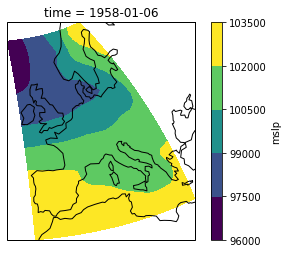

In [79]:
ax = plt.axes(projection=ccrs.Orthographic(-20, 30))
df['mslp'].isel(time=5).plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.coastlines()

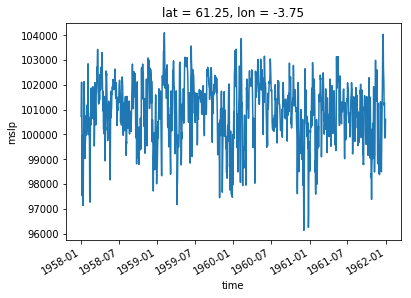

In [80]:
df['mslp'].isel(lat=5, lon=5).plot()

In [81]:
clima = df.rolling(time=20, center=True).groupby('time.dayofyear').mean('time')#.dropna('time')
clima

AttributeError: 'DatasetRolling' object has no attribute 'groupby'

In [ ]:
clima['mslp'].isel(lat=5,lon=5).plot()